# Uczenie Maszynowe - ćwiczenia 4 (plik roboczy)

Celem dzisiejszych ćwiczeń jest rozpoczęcie pracy z scikit-learn i budowy pierwszych modeli regresyjnych (tak jak na wykładzie).

## Zadanie 1 - zapoznanie z regresją

Poniżej podano wektor dwóch zmiennych X (cechy) i y (zmienna celowa), które są od siebie zależne i mogą posłużyć do modelowania regresji. Zapoznajmy się najpierw z danymi:


In [2]:
import numpy as np

In [3]:
x = np.array([0,1,2,2.1,3,3.2,4,4.6]).reshape(-1,1)
y = np.array([0,1.1,1.9,2.4,3.1,3.8,3.8,8])

1a. Wyświetl dane na wykresie punktowym używając biblioteki matplotlib

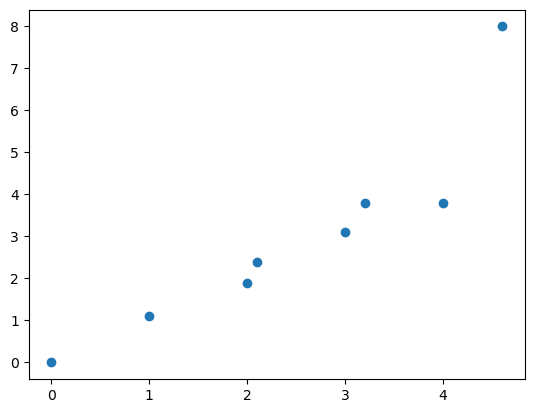

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

Zależność jest linowa. Wpasujmy zatem prostą regresji w nasze dane.

Proces uczenia modelu w scikit-learn wygląda podobnie dla wszystkich algorytmów. Należy kolejno:

    Wczytać model: 
        from sklearn import linear_model
    Zainstacjnować model
        model = linear_model.LinearRegression()
    Wytrenować: metodą fit(X,y)
    Dokonać predykcji: metodą predict(X)
    
    1b. Zaimplementuj ten proces poniżej oraz
    1c. Wyświetl równanie prostej
    1d. Wyświetl dane i wpasowaną prostą regresji na wykresie
    1f. Dokonaj predykcji dla zbioru czterech dowolnych wartości cechy X

In [7]:
from sklearn import linear_model

#1b. Zaimplementuj ten proces poniżej 
model = linear_model.LinearRegression()
model.fit(x,y)
y_predict = model.predict(x)
print(y_predict)
print(y)


[-0.56441328  0.87354181  2.3114969   2.4552924   3.74945198  4.037043
  5.18740707  6.05018012]
[0.  1.1 1.9 2.4 3.1 3.8 3.8 8. ]


In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
mean_squared_error(y,y_predict)

0.8433632252625132

In [10]:
#1c. Wyświetl równanie prostej
a = model.coef_[0]
b = model.intercept_
print(f"y={a:.3f}x+{b:.3f} ")

y=1.438x+-0.564 


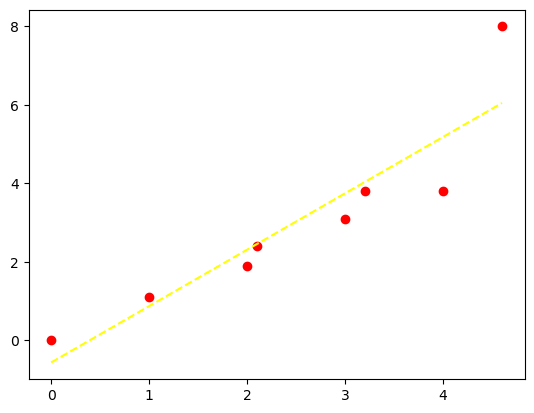

In [11]:
#1d. Wyświetl dane i wpasowaną prostą regresji na wykresie
plt.scatter(x,y, color = 'red')
plt.plot(x,y_predict, color = 'yellow', ls = '--')
plt.show()

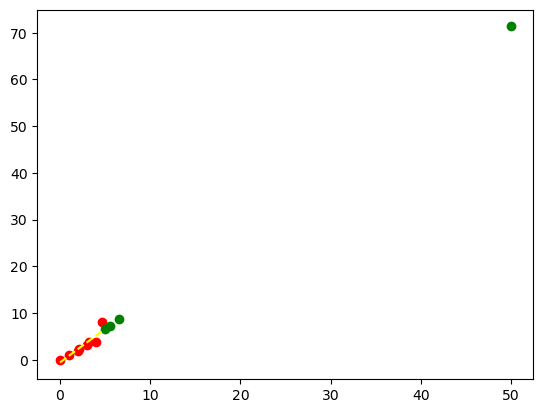

In [12]:
#1f. Dokonaj predykcji dla zbioru czterech dowolnych wartości cechy X

x_new = np.array([5.5,6.5,5,50]).reshape(-1,1)
y_predict_new = model.predict(x_new)

plt.scatter(x,y, color = 'red')
plt.scatter(x_new, y_predict_new, color = 'green')
plt.plot(x,y_predict, color = 'yellow', ls = '--')
plt.show()

## Zadanie 2 - proces modelowania regresji

Proces budowy modelu zaczynamy od pozyskania danych. Skorzystamy z gotowych przykładów danych, które już dostępne są w bibliotece scikit-learn. Wczytaj dane dotyczące cen nieruchmości w Kalifornii jak poniżej i zapoznaj się ze zbiorem danych.
Dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

Wczytany zostanie słownik, który ma następujące klucze 'data' - dane, 'target' - cel predykcji, 'target_names' - nazwa zmiennej celowej (zależnej), 'feature_names' - nazwy zmiennych.

    2a. Wykorzystaj pandasa by uporządkować te dane w DataFrame
    2b. Sprawdź czy danych są braki, puste wartości.

In [14]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
california = fetch_california_housing()

In [15]:
df = pd.DataFrame(california.data, columns = california.feature_names)

In [16]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [17]:
brak_danych = df.isnull().sum()

In [18]:
brak_danych

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

W celu przeprowadzenia treningu i skutecznej oceny modelu, dane należy podzielić na dwa (a w zasadzie na trzy) zbiory: treningowy i testowy (treningowy, walidacyjny i testowy).

Zbiór treningowy służy do uczenia modelu, czyli dopasowania parametrów modelu do wzorców ukrytych w danych. Na podstawie zbioru treningowego model uczy się relacji między zmiennymi wejściowymi a wyjściową, którą chcemy przewidzieć.

Zbiór testowy jest używany wyłącznie do oceny modelu, a więc do sprawdzenia, jak dobrze wyuczone zależności przekładają się na dane, których model wcześniej nie widział. Pomaga to ocenić, czy model jest ogólny i sprawdzi się na nowych, nieznanych danych.

    2c.  Przeprowadź podział danych na zbiór treningowy i testowy za pomocą funkcji train_test_split(). Zastosouj podział w stosunku 4:1.

In [20]:
from sklearn.model_selection import train_test_split
df['Target'] = california.target

In [100]:
from sklearn.model_selection import train_test_split
df['Target'] = california.target
X = df[california.feature_names]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [22]:
X_train.shape

(16512, 8)

In [23]:
X_test.shape

(4128, 8)

In [24]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Zanim zaczniemy proces modelowania, należy również dobrze zrozumieć dane. Dokonajmy więc najpierw odpowiedniej analizy naszych danych, musimy zwrócić uwagę przede wszystkim na

    Jakie mamy dane - zrozumieć czym one są. Jakiego są typu - czy to wartości ciągłe czy kategoryczne?
    Jakie mają wartości? Czy wykazują rozkład normalny?
    Które cechy są najbardziej powiązane ze zmienną zależną?
    Które cechy są ze sobą powiązane i potencjalne są redundantne?
    
Żeby szybko zrozumieć nasze dane, możemy szybko wykorzystać kilka przydantych funkcji:

    Metoda .describe() w Pandas do opisu statystycznego danych
    Biblioteka seaborn do wizualizacji rozkładów - seaborn.violinplot()
    Wizualizacja zależności pomiędzy zmiennymi za pomocą scatterplot() lub seaborn.jointplot() (szybka wizualizacja seaborn.pairplot())
    Korelacja między zmiennymi (metoda corr() pandasa i seaborn.heatmap() ) do wizualizacji

Zapoznaj się z danymi:

    2d. Zastanów się jakiego typu są zmienne w danych,
    2e. Policz statystyki za pomocą metody describe()
    2f. Zwizualizuj rozkłady danych (użyj violinplot)
    2g. Zwizualizuj zależności między danymi.
    2h. Policz korelacje między danymi. Policz korelację Spearmana i Pearsona. Jaka jest różnica? Użyj wizualizacji heatmap()


In [26]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Kluczowy jest wybór odpowiednich cech do uczenia naszego modelu. Przystąpmy zatem do procesu uczenia. Użyjmy najpierw regresji liniowej.
Proces uczenia jest prosty, tak jak w zadaniu 1 - instancjonujemy model, używamy metod fit() i predict() do odpowiednio - treningu i ewaluacji.
Ewaluację przeprowadzamy z wykorzystaniem miar - jak na wykładzie. Miary dostępne są w ramach biblioteki scikit-learn (sklearn.metrics). Składania wygląda zwykle tak samo
`nazwa_metody(prawdziwe_wyniki, predykowane_wyniki`

    2i. Wybierz najbardziej powiązaną (wg. ciebie) cechę ze zmienną zależną i zbuduj dla niej model regresji liniowej. Dokonaj ewaluacji modelu za pomocą wybranej przez siebie miary. Sprawdź dokładnośc modelu na zbioru treningowym i testowym. Jakie widzisz różnice?

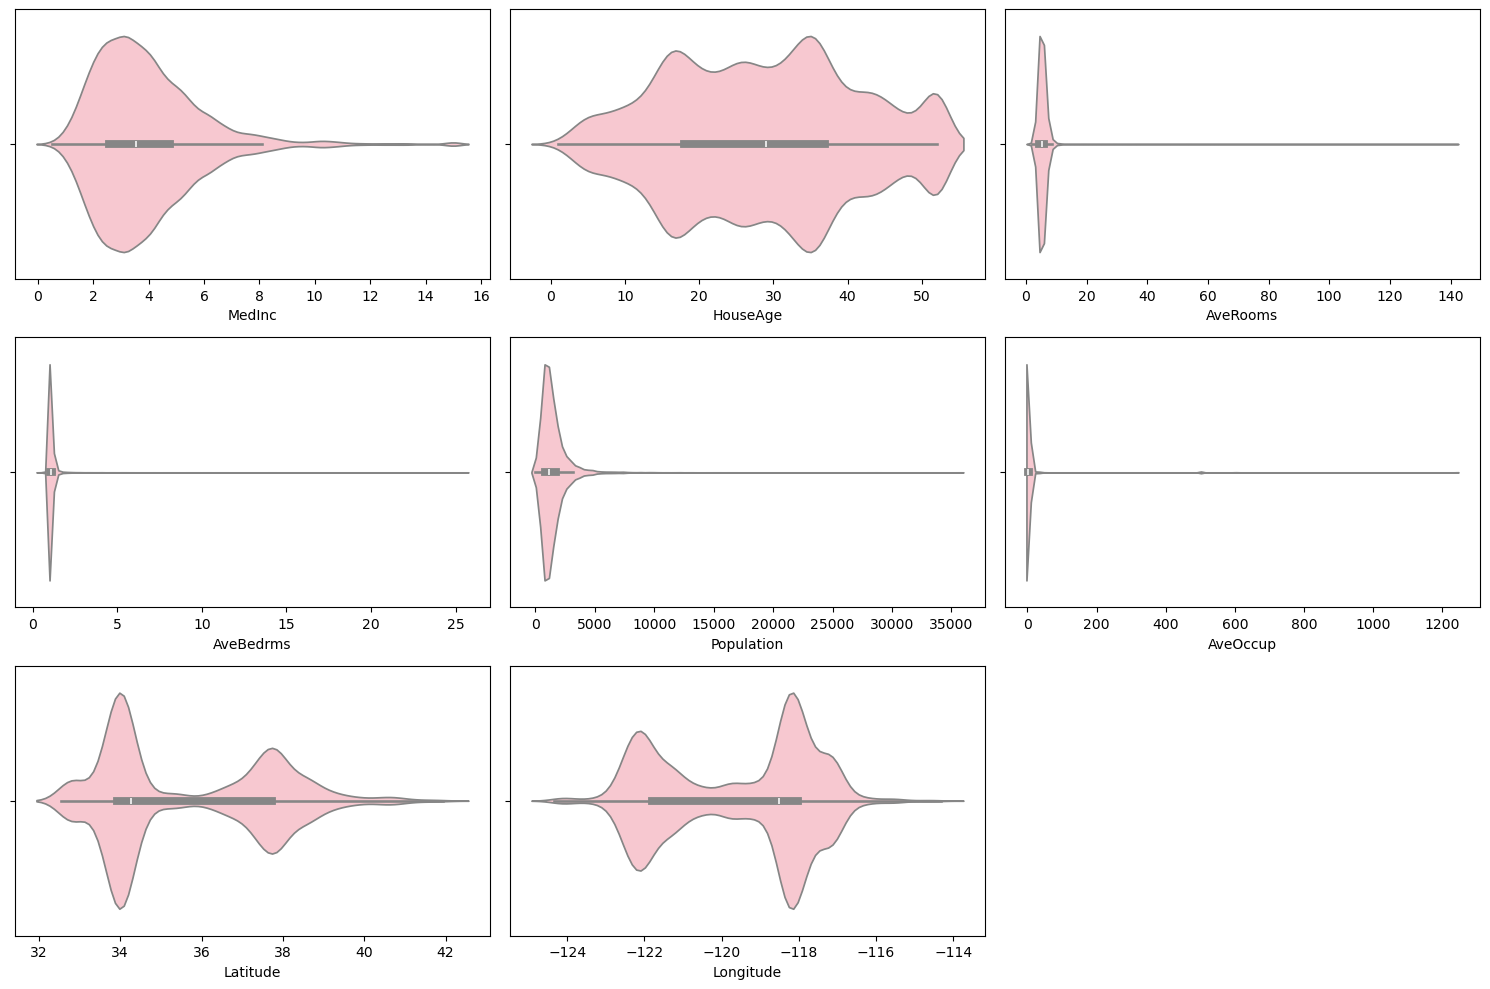

In [28]:
# 2f. Zwizualizuj rozkłady danych (użyj violinplot)
train = pd.DataFrame(X_train, columns=df.columns)

import seaborn as sns
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_train[:], 1):
    plt.subplot(3,3,i)
    sns.violinplot(data=train, x = column, color='pink')
plt.tight_layout()
plt.show()

In [29]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

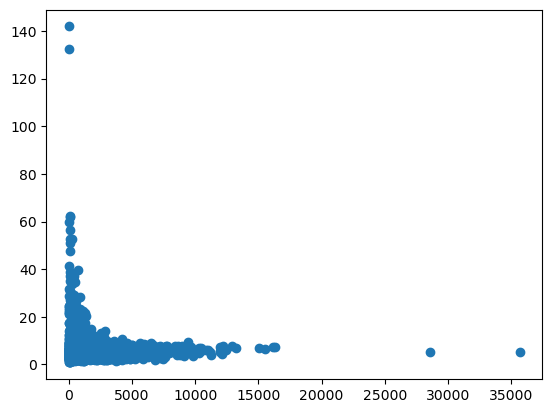

In [30]:
plt.scatter(df['Population'],df['AveRooms'])

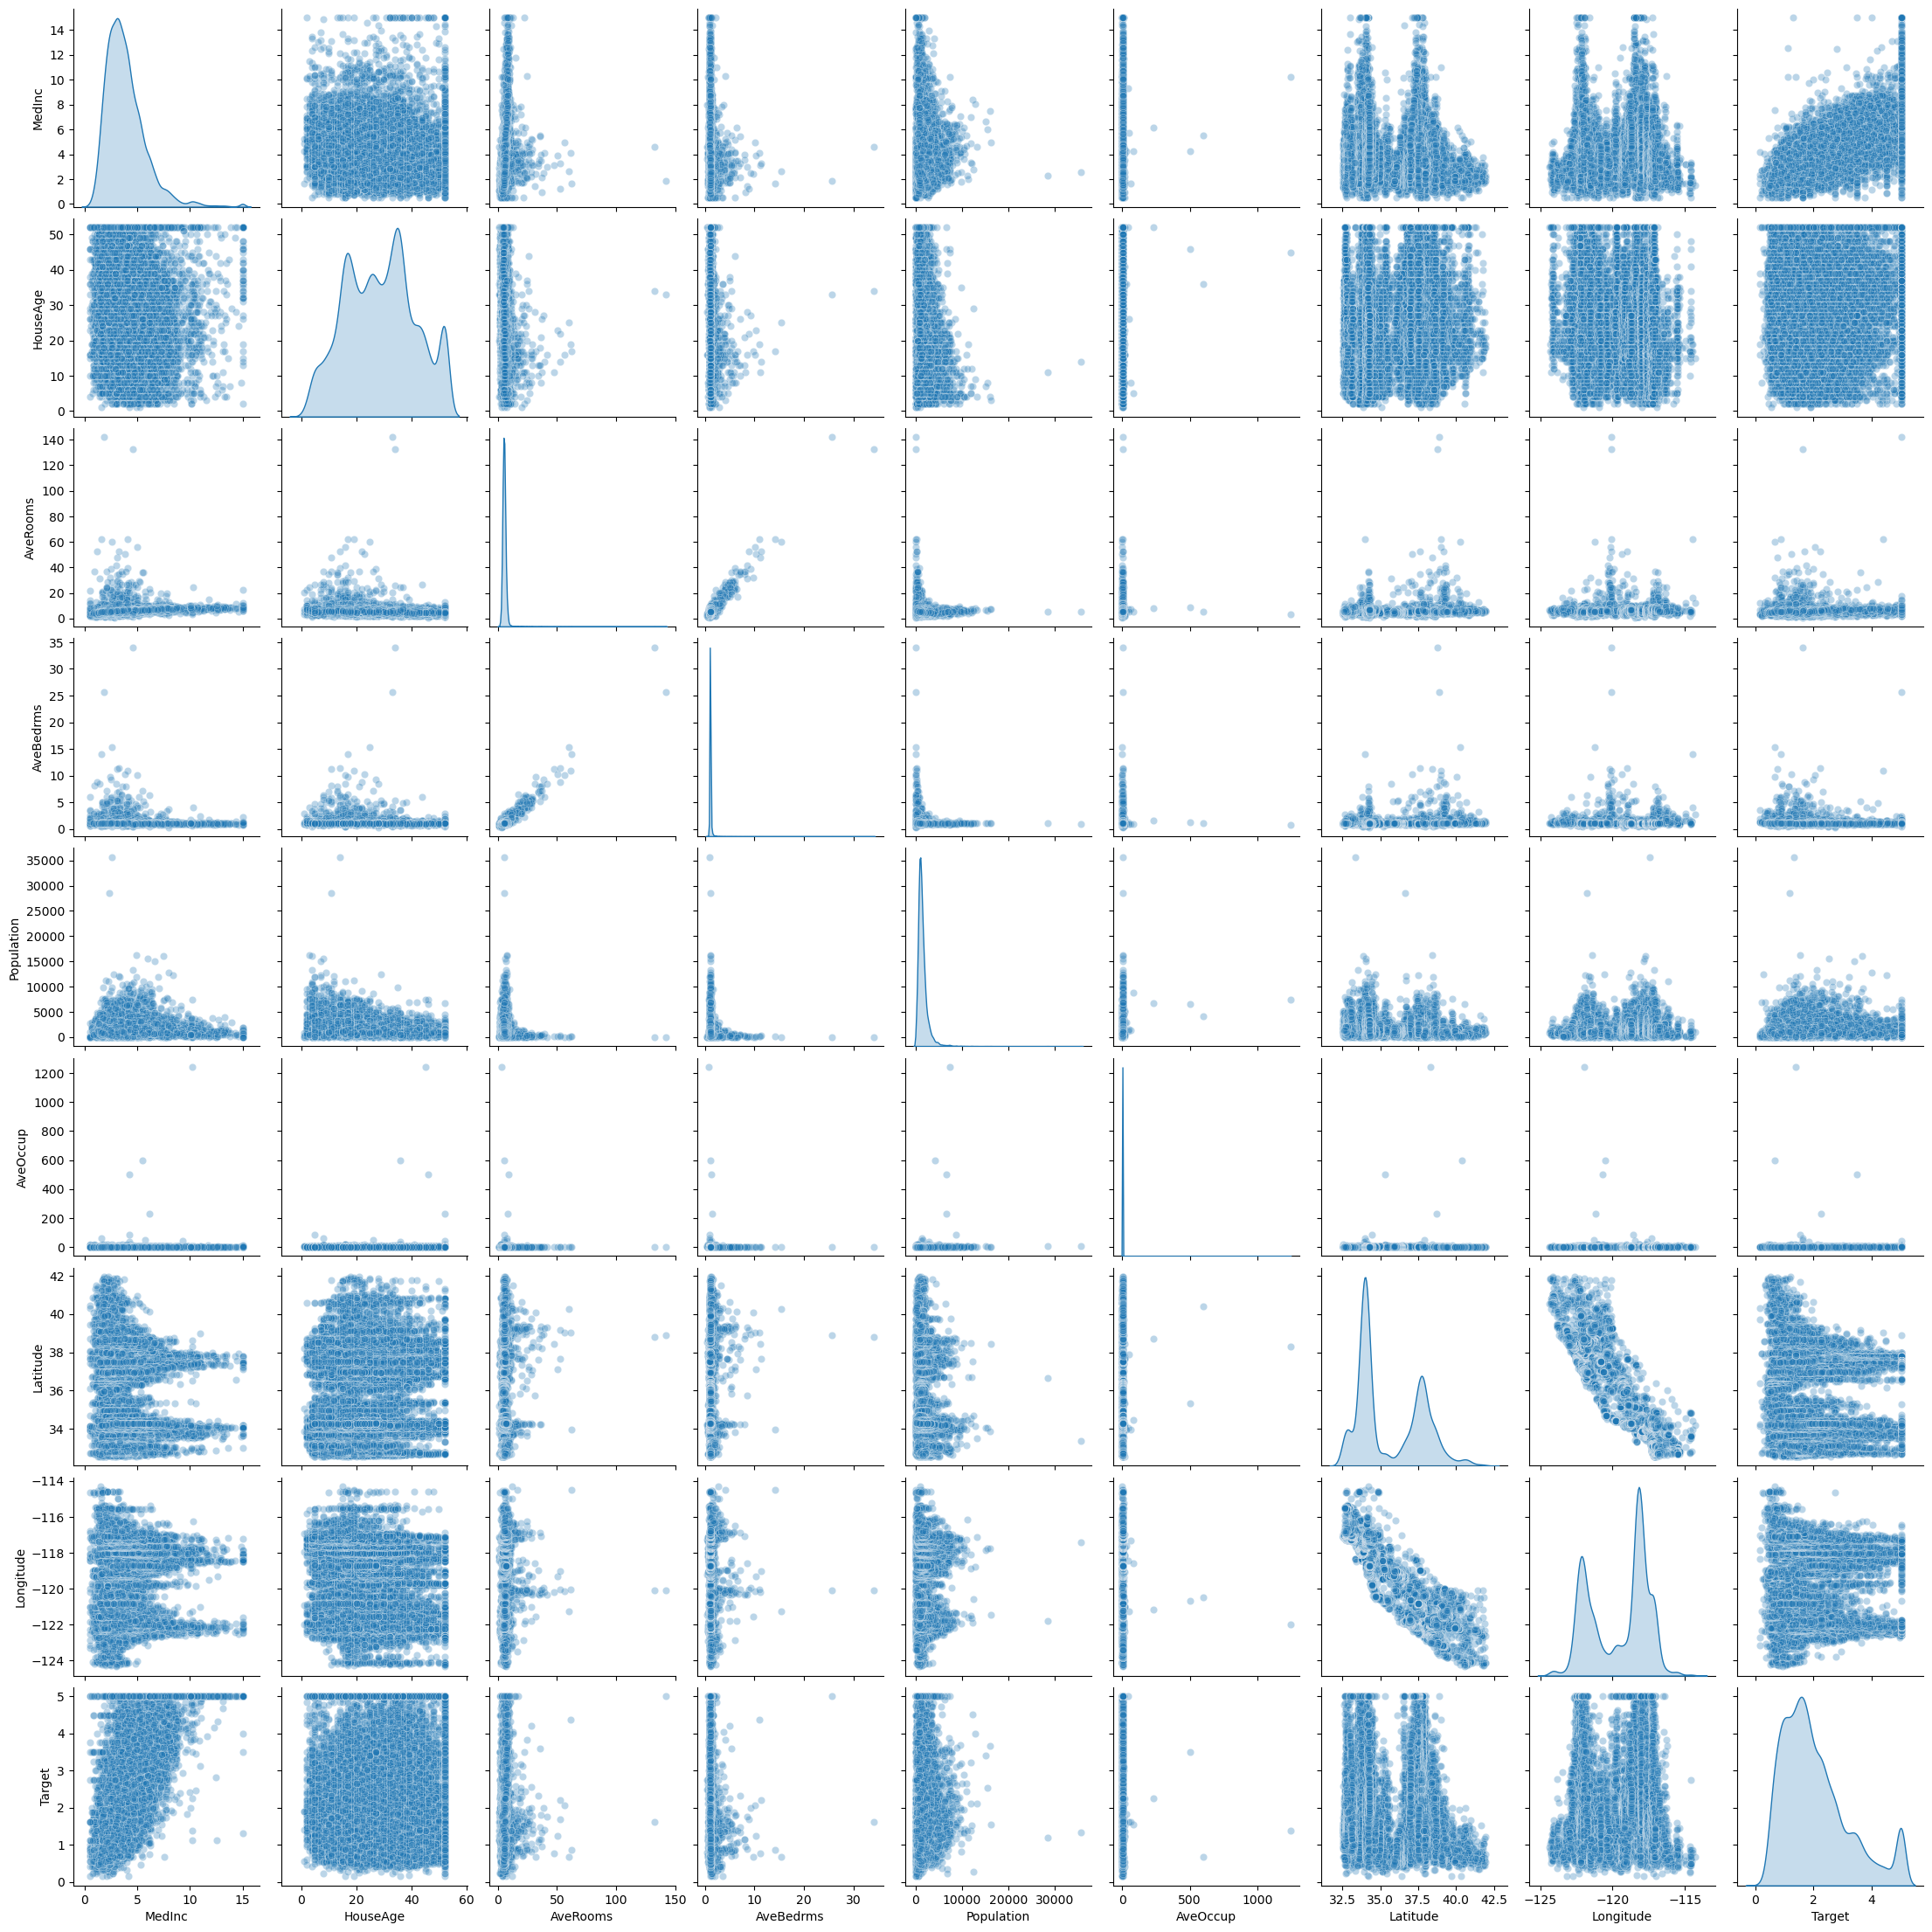

In [31]:
# 2g. Zwizualizuj zależności między danymi.

sns.pairplot(df, diag_kind = 'kde', plot_kws={'alpha':0.3})
plt.show()

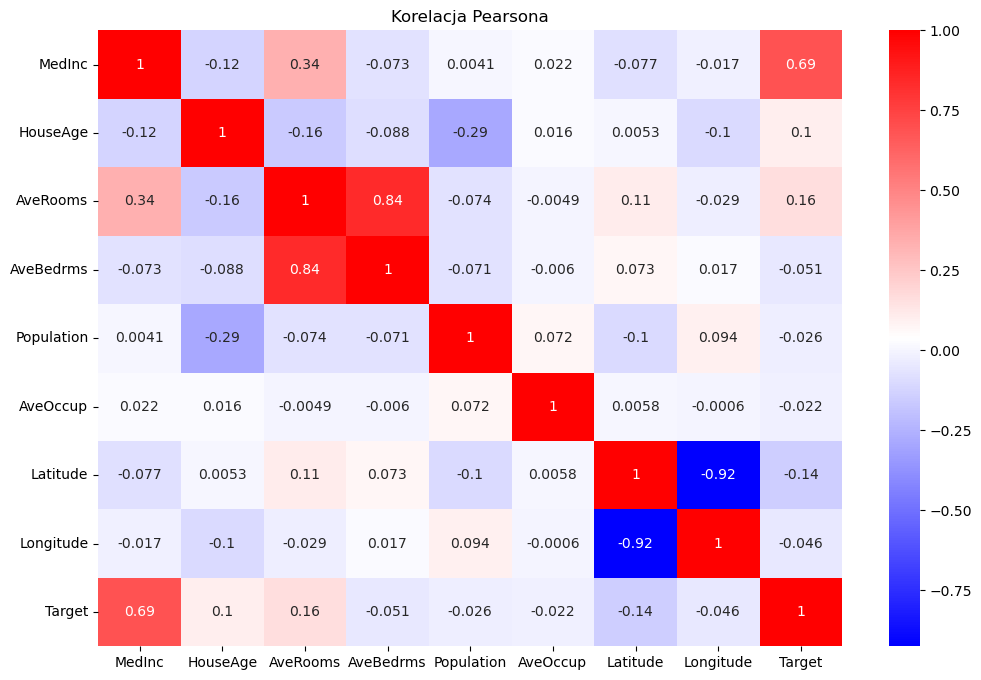

In [32]:
#2h. Policz korelacje między danymi. Policz korelację Spearmana i Pearsona. Jaka jest różnica? Użyj wizualizacji heatmap()
#Pearson 
dane_testowe = pd.concat([X_train, y_train], axis=1)
pearson_cor = dane_testowe.corr(method='pearson')
plt.figure(figsize=(12,8))
sns.heatmap(pearson_cor, annot=True, cmap='bwr')
plt.title('Korelacja Pearsona')
plt.show()

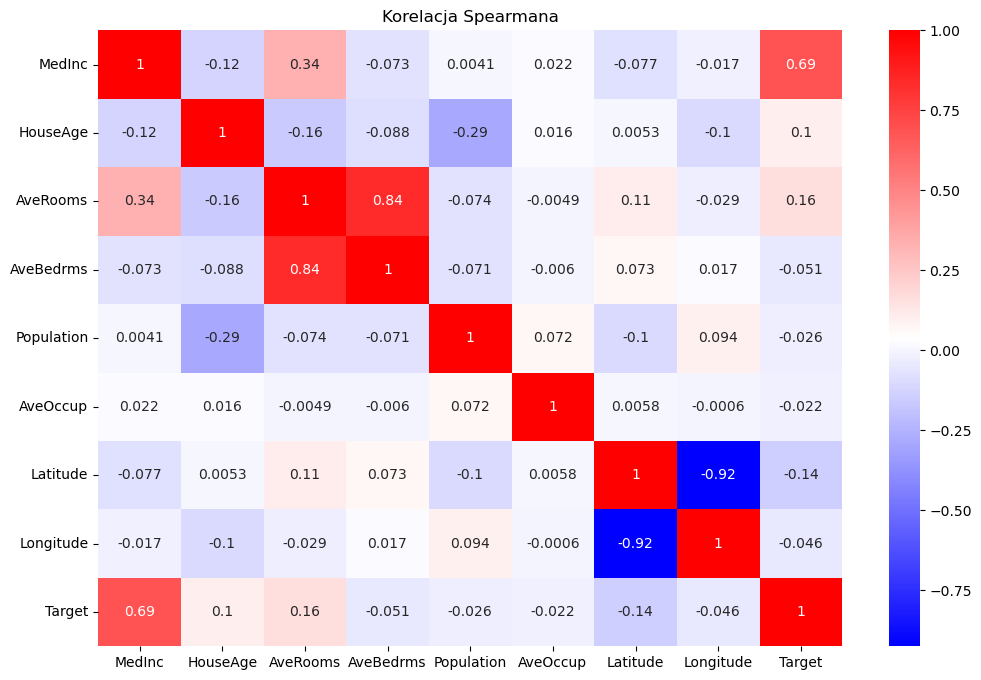

In [33]:
dane_testowe = pd.concat([X_train, y_train], axis=1)
spearman_cor = dane_testowe.corr(method='spearman')
plt.figure(figsize=(12,8))
sns.heatmap(pearson_cor, annot=True, cmap='bwr')
plt.title('Korelacja Spearmana')
plt.show()

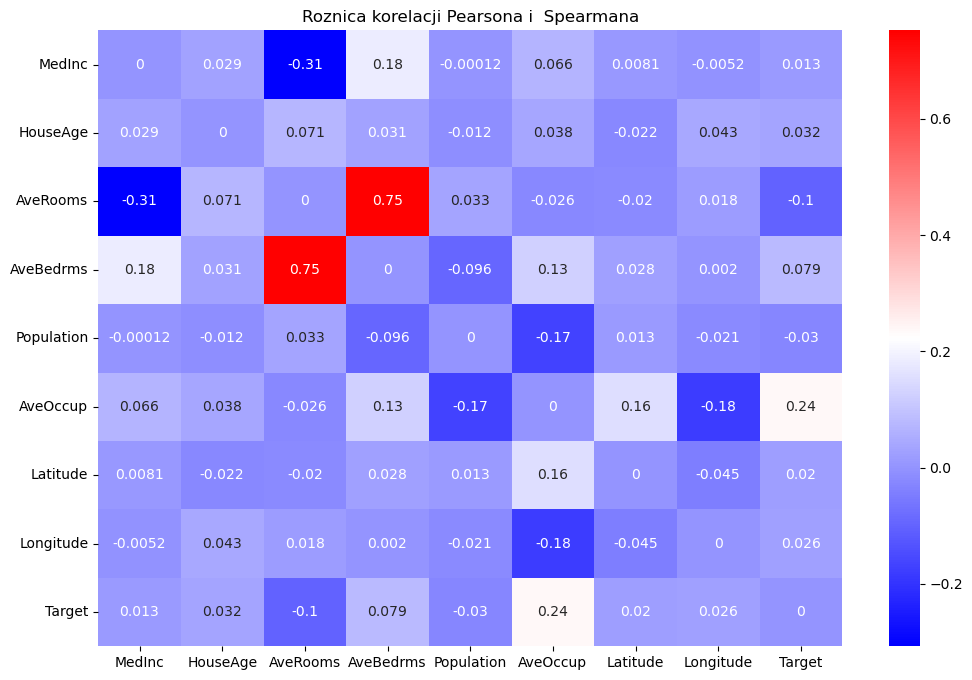

In [34]:
cor_dif = pearson_cor - spearman_cor
plt.figure(figsize=(12,8))
sns.heatmap(cor_dif, annot=True, cmap='bwr')
plt.title('Roznica korelacji Pearsona i  Spearmana')
plt.show()

## Zadanie 3. Regresja wieloraka

Wykorzystanie tylko jednej zmiennej do predykcji naszej zmiennej zależnoej wydaje się bardzo ograniczone. Wykorzystajmy dlatego regresję wielomianową, gdzie predykcja odbywać się będzie z wykorzystaniem kilku zmiennych na raz.

W sensie technicznym - nie musimy nic zmieniać. Użyjemy tego samego modelu, podając jako zmienną X więcej cech jednocześnie.

    3. Powtórz proces treningu z zadania 2 z wykorzystaniem regresji wielorakiej. Spróbuj wybrać trzy różne kombinacje cech i sprawdź jak wpływają one na wynik końcowy.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

Kombinacja 1: ['MedInc', 'AveRooms', 'Latitude']
Zbiór treningowy: MSE: 0.68, R2: 0.49
Zbiór testowy: MSE: 0.69, R2: 0.47
Kombinacja 2: ['MedInc', 'Latitude', 'HouseAge']
Zbiór treningowy: MSE: 0.64, R2: 0.52
Zbiór testowy: MSE: 0.65, R2: 0.50
Kombinacja 3: ['HouseAge', 'AveRooms', 'MedInc']
Zbiór treningowy: MSE: 0.65, R2: 0.52
Zbiór testowy: MSE: 0.66, R2: 0.50
Kombinacja 4: ['MedInc', 'AveRooms', 'Latitude', 'HouseAge']
Zbiór treningowy: MSE: 0.64, R2: 0.52
Zbiór testowy: MSE: 0.65, R2: 0.50
Kombinacja 5: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Zbiór treningowy: MSE: 0.52, R2: 0.61
Zbiór testowy: MSE: 0.56, R2: 0.58


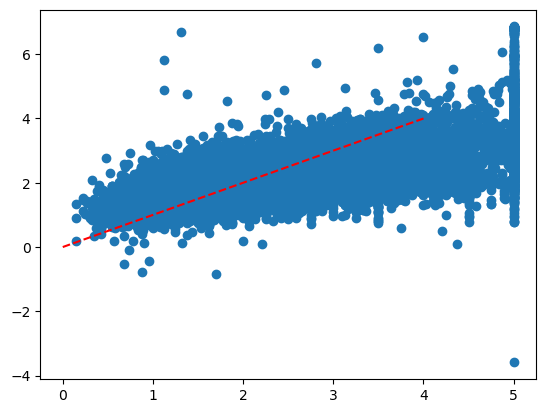

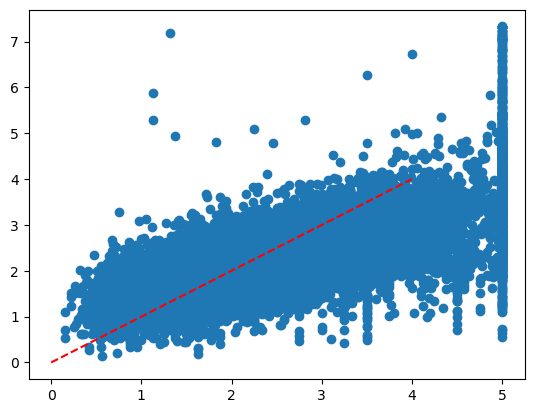

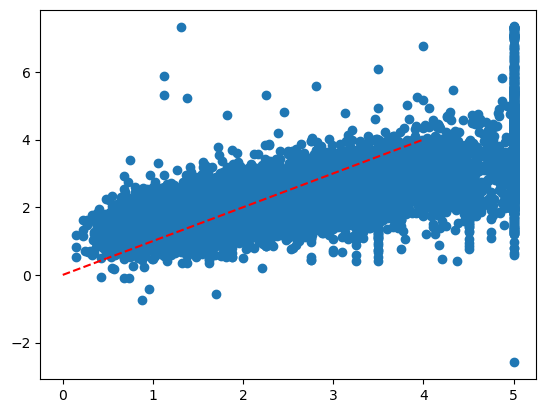

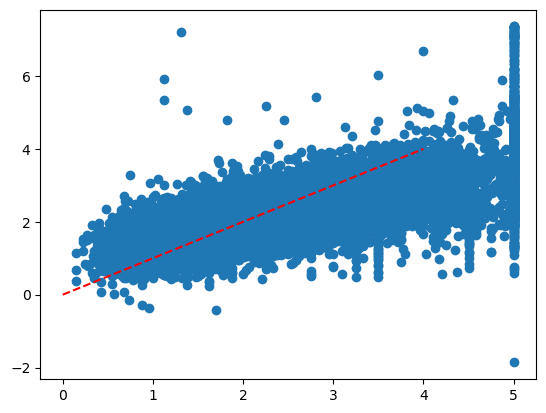

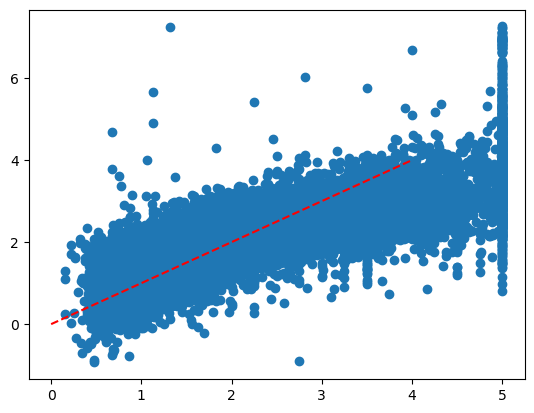

In [38]:
combinations = [['MedInc', 'AveRooms', 'Latitude'], 
                ['MedInc', 'Latitude', 'HouseAge'],
                ['HouseAge', 'AveRooms', 'MedInc'],
                ['MedInc', 'AveRooms', 'Latitude', 'HouseAge'],
                ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude', 'Longitude']]

for i, comb in enumerate(combinations, 1):
    X_sel = X_train[comb]
    model = LinearRegression()
    model.fit(X_sel, y_train)

    y_train_pred = model.predict(X_sel)
    y_test_pred = model.predict(X_test[comb])
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)

    test_r2 = r2_score(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    print(f"Kombinacja {i}: {comb}")
    print(f"Zbiór treningowy: MSE: {train_mse:.2f}, R2: {train_r2:.2f}")
    print(f"Zbiór testowy: MSE: {test_mse:.2f}, R2: {test_r2:.2f}")

    plt.figure()
    plt.plot(np.arange(0,5), np.arange(0,5), ls="--", color="red")
    plt.scatter(y_train, y_train_pred)

## Zadanie 4. Regresja wielomianowa

Regresja liniowa to bardzo prosty model. Możemy zwiększyć zdolność naszego modelu do przedstawiania złożonych zależności między danymi wykorzystując kombinacje cech. Nazywa się to <b>inżynierią cech </b>.

Dokonajmy kombinacji naszych cech by uzyskać bardziej złożone równanie regresji. Kombinacje oznaczają np. iloczyny lub ilorazy cech, ich kwadraty i tym podobne.

Wykorzystać możemy do tego celu funkcję wbudowaną w scikit-learn, która obliczy kombinacje cech za nas. Jest to funkcja PolynomialFeatures z sklearn.preprocessing.

    4. Powtórz proces treningu z zadania 3 z wykorzystaniem regresji wielomianowej. Spróbuj wybrać cztery różne kombinacje cech i sprawdź jak wpływają one na wynik końcowy.
    4a. Policz kombinacje cech i oblicz ich korelacje oraz zwizualizuj związek ze zmienną celową.
    4b. Wybierz najbardziej obiecujące cechy i wytrenuj model regresji wielomianowej (to nadal będzie model LinearRegression).
    
    

In [40]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

X_sel = X_train[['MedInc', 'AveRooms', 'Latitude']]


poly = PolynomialFeatures(4, interaction_only=False, include_bias = False)
X_train_poly = poly.fit_transform(X_sel)
X_test_poly = poly.transform(X_test[['MedInc',  'AveRooms', 'Latitude']])

model.fit(X_train_poly, y_train)

y_train_pred_poly = model.predict(X_train_poly)
y_test_pred_poly = model.predict(X_test_poly)

test_mse = mean_squared_error(y_test, y_test_pred_poly)
train_mse = mean_squared_error(y_train, y_train_pred_poly)

test_r2 = r2_score(y_test, y_test_pred_poly)
train_r2 = r2_score(y_train, y_train_pred_poly)

print(f"Zbiór treningowy: MSE: {train_mse:.2f}, R2: {train_r2:.2f}")
print(f"Zbiór testowy: MSE: {test_mse:.2f}, R2: {test_r2:.2f}")


Zbiór treningowy: MSE: 0.60, R2: 0.55
Zbiór testowy: MSE: 1.18, R2: 0.10


In [41]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.linear_model import LinearRegression
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns = california.feature_names)
from sklearn.model_selection import train_test_split
df['Target'] = california.target
X = df[california.feature_names]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

combinations = [['MedInc', 'AveRooms', 'Latitude'], 
                ['MedInc', 'Latitude', 'HouseAge'],
                ['HouseAge', 'AveRooms', 'MedInc'],
                ['MedInc', 'AveRooms', 'Latitude', 'HouseAge'],
                ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude', 'Longitude']]

In [42]:
def fitt(combination, degree, inter, bias):
    model = LinearRegression()
    X_sel = X_train[combination] # HERE
    poly = PolynomialFeatures(degree, interaction_only=inter, include_bias = bias) # HERE
    X_train_poly = poly.fit_transform(X_sel)
    X_test_poly = poly.transform(X_test[combination]) # HERE
    model.fit(X_train_poly, y_train)
    y_train_pred_poly = model.predict(X_train_poly)
    y_test_pred_poly = model.predict(X_test_poly)

    test_mse = mean_squared_error(y_test, y_test_pred_poly)
    train_mse = mean_squared_error(y_train, y_train_pred_poly)

    test_r2 = r2_score(y_test, y_test_pred_poly)
    train_r2 = r2_score(y_train, y_train_pred_poly)

#     print(f"Zbiór treningowy: MSE: {train_mse:.2f}, R2: {train_r2:.2f}")
#     print(f"Zbiór testowy: MSE: {test_mse:.2f}, R2: {test_r2:.2f}")
    
    return train_mse, test_mse

## Zadanie 5. Dobór odpowiedniego modelu

Przeprowadźmy pewien eksperyment. Wykorzystaj kod z zadania 4 by obliczyć błąd predykcji na zbiorze testowym i treningowym dla różnych stopni wielomianiu i kombinacji cech. Zwizualizuj tę zależność.

Możemy zaobserwować 3 przypadki:
    
    Dokładność na zbiorze treningowym i testowym jest niska
    Dokładność na zbiorze treningowym jest wysoka a na testowym niska
    Dokładność na obu zbiorach jest wysoka (średnia)
    
Co oznacza każdy z tych przypadków?

In [44]:
c1 = combinations[1]
cfull = combinations[-1]

In [45]:
import matplotlib.pyplot as plt

In [46]:
c1_test_results = []
for d in range(2,10):
    r2_train, r2_test = fitt(c1,d,False,True)
    c1_test_results.append(r2_test)
    
cfull_test_results = []
for d in range(2,5):
    r2_train, r2_test = fitt(cfull,d,True,True)
    cfull_test_results.append(r2_test)

In [47]:
np.arange(2,5)

array([2, 3, 4])

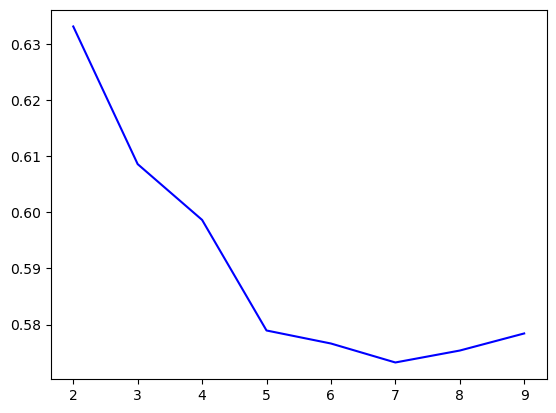

In [48]:
plt.plot(np.arange(2,10),c1_test_results,c='b')
# plt.plot(np.arange(2,5),cfull_test_results,c='k')

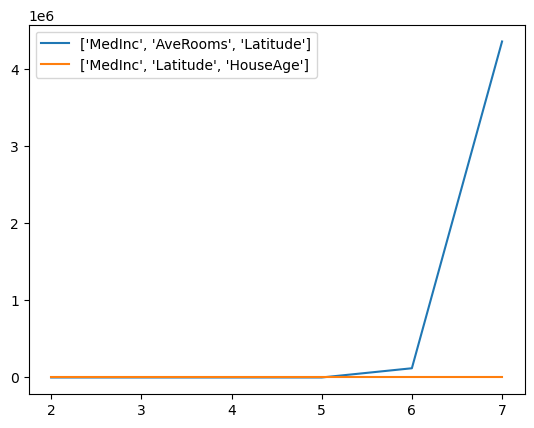

In [49]:
for c in combinations[:-3]:
    test_results = []
    for d in range(2,8):
        r2_train, r2_test = fitt(c,d,False,True)
        test_results.append(r2_test)
    plt.plot(np.arange(2,8),test_results,label='{}'.format(c))
    plt.legend()

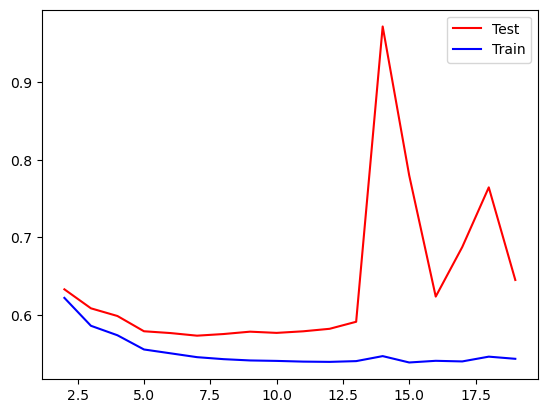

In [50]:
c1_test_results = []
c1_train_results = []
for d in range(2,20):
    r2_train, r2_test = fitt(c1,d,False,True)
    c1_test_results.append(r2_test)
    c1_train_results.append(r2_train)
plt.plot(np.arange(2,20),c1_test_results,c='r',label='Test')
plt.plot(np.arange(2,20),c1_train_results,c='b',label="Train")
plt.legend()

## Zadanie 6. Regularyzacja modeli

Regularyzacja to technika, która pomaga zapobiegać przeuczeniu (overfitting) modelu, narzucając dodatkowe wymogi do procesu treningu modelu. Najpopularniejszym przykładem będzie regularyzacjia regresji liniowej Ridge oraz Lasso. W Ridge i Lasso regresji regularyzacja jest wprowadzana przez dodatkowy człon w funkcji kosztu:

    Ridge (L2): Dodaje kwadrat wartości współczynników do funkcji kosztu. Powoduje to, że współczynniki są „ściągane” bliżej zera, ale nigdy dokładnie do zera. Jest to przydatne, gdy chcemy zmniejszyć wagę mniej istotnych cech, ale ich nie usuwać.

    Lasso (L1): Dodaje wartość absolutną współczynników do funkcji kosztu. Lasso może ustawiać współczynniki dokładnie na zero, co skutkuje selekcją cech. Jest przydatne, gdy chcemy automatycznie eliminować mniej istotne cechy.

Dzięki regularyzacji model staje się bardziej ogólny i może lepiej działać na nowych danych.

    6a. Wykorzystaj modele Ridge i Lasso (from sklearn.linear_model import Ridge, Lasso) by wytrenować regresję wielomianową dla naszego problemu. Zapoznaj się dokumentacją tych modeli. Przetestuj wyniki regresji z wykorzystaniem różnych parametrów dla tych modeli.
    
    6b.Wyrysuj krzywe złozoności dla modeli Ridge, Lasso, ElasticNet (uwzględnij rózne parametry alpha) i porownaj wyniki ze modelem regresji wielomianowej.

In [52]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [53]:
models = [LinearRegression, Ridge, Lasso, ElasticNet]

In [54]:
combination = ['MedInc', 'AveRooms', 'Latitude']
degree = 4
for m in models:
    model = m()
    X_sel = X_train[combination] # HERE
    poly = PolynomialFeatures(degree, interaction_only=False, include_bias = True) # HERE
    X_train_poly = poly.fit_transform(X_sel)
    X_test_poly = poly.transform(X_test[combination]) # HERE
    model.fit(X_train_poly, y_train)
    y_train_pred_poly = model.predict(X_train_poly)
    y_test_pred_poly = model.predict(X_test_poly)

    test_mse = mean_squared_error(y_test, y_test_pred_poly)
    train_mse = mean_squared_error(y_train, y_train_pred_poly)

    test_r2 = r2_score(y_test, y_test_pred_poly)
    train_r2 = r2_score(y_train, y_train_pred_poly)
    print(m)
    print(f"Zbiór treningowy: MSE: {train_mse:.2f}, R2: {train_r2:.2f}")
    print(f"Zbiór testowy: MSE: {test_mse:.2f}, R2: {test_r2:.2f}")


<class 'sklearn.linear_model._base.LinearRegression'>
Zbiór treningowy: MSE: 0.57, R2: 0.57
Zbiór testowy: MSE: 0.60, R2: 0.54
<class 'sklearn.linear_model._ridge.Ridge'>
Zbiór treningowy: MSE: 0.58, R2: 0.57
Zbiór testowy: MSE: 0.60, R2: 0.54


C:\Users\student\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.1658e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\student\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.911e+03, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(


<class 'sklearn.linear_model._coordinate_descent.Lasso'>
Zbiór treningowy: MSE: 0.59, R2: 0.56
Zbiór testowy: MSE: 0.61, R2: 0.54
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
Zbiór treningowy: MSE: 0.59, R2: 0.56
Zbiór testowy: MSE: 0.61, R2: 0.53


C:\Users\student\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.911e+03, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(


In [55]:
fitt(c1,7,True,True)

(0.6366514487955932, 0.6460838408583027)

# Zadanie 7. Walidacja krzyżowa

Podział danych na zbiór testowy i treningowy to uproszczony wariant, który ma pewną wadę - zbiór testowy *należy użyć tylko raz*. Dobór parametrów na podstawie wyników na zbiorze testowym jest obarczony błędem statystycznym.

Dlatego też stosujemy walidację krzyżową.
Walidacja krzyżowa to technika stosowana do oceny wydajności modelu na różnych podzbiorach danych. W klasycznej walidacji krzyżowej K-Fold dzielimy dane na K równych części (folds). Model jest trenowany na K-1 częściach, a pozostała część służy jako zbiór testowy. Proces jest powtarzany K razy, tak aby każdy fold pełnił rolę zbioru testowego raz. Wyniki są uśredniane, co daje bardziej stabilny i wiarygodny wynik niż pojedynczy podział na zbiory treningowy i testowy.

Walidacja krzyżowa ma kilka zalet:

    Stabilność i dokładność: Uśrednienie wyników z kilku foldów redukuje wpływ losowego podziału danych, co daje bardziej stabilny wynik.
    Efektywność przy małych zbiorach danych: Pomaga maksymalnie wykorzystać dostępne dane do oceny modelu.
    
    7a. Wybierz najlepszy ze swoich modeli i dodaj do kodu walidację krzyżową wykorzystując jedną ze wbudowanych funkcji walidacji krzyżowej. Może być to cross_val_score lub klasa KFold (więcej omówimy na wykładzie).

In [94]:
y_train = np.array(y_train )
y_train

array([1.03 , 3.821, 1.726, ..., 2.221, 2.835, 3.25 ])

In [144]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

df['Target'] = california.target
X = df[california.feature_names]
y = df['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

combination = ['MedInc', 'AveRooms', 'Latitude']
degree = 3
alpha = 12
poly = PolynomialFeatures(degree)

X_train_poly = poly.fit_transform(X_train[combination])
X_test_poly = poly.transform(X_test[combination])

ridge_model = LinearRegression()
kf = KFold(n_splits=5,shuffle=True, random_state = 12)

for training, valid in kf.split(X_train_poly, y_train):
    ridge_model.fit(X_train_poly[training], y_train[training])
    y_train_pred = ridge_model.predict(X_train_poly[training])
    y_valid_pred = ridge_model.predict(X_train_poly[valid])
    
    train_mse = mean_squared_error(y_train[training], y_train_pred)
    valid_mse = mean_squared_error(y_train[valid], y_valid_pred)

    train_r2 = r2_score(y_train[training], y_train_pred)
    valid_r2 = r2_score(y_train[valid], y_valid_pred)

    print('trening mse:',round(train_mse,2),'training r2:',round(train_r2,2))
    print('valid mse:',round(valid_mse,2),'valid r2:',round(valid_r2,2))

trening mse: 0.62 training r2: 0.54
valid mse: 0.64 valid r2: 0.53
trening mse: 0.62 training r2: 0.54
valid mse: 0.61 valid r2: 0.53
trening mse: 0.61 training r2: 0.54
valid mse: 26.71 valid r2: -18.91
trening mse: 0.62 training r2: 0.53
valid mse: 0.63 valid r2: 0.54
trening mse: 0.62 training r2: 0.54
valid mse: 0.64 valid r2: 0.52


In [146]:
ridge_model.fit(X_train_poly,y_train)
y_test_pred = ridge_model.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(test_mse,test_r2)

0.6515535108724574 0.5027861364723657


In [80]:
len(training)

13209

In [86]:
y_train.iloc[training]

8267     3.821
17445    1.726
2271     0.965
17848    2.648
6252     1.573
         ...  
16850    3.081
6265     1.635
11284    2.292
5390     2.221
15795    3.250
Name: Target, Length: 13209, dtype: float64